# House Sales in King County, USA
[1. Importing Visualization Libararies and Data](#1.-Importing-Visualization-Libraries-and-Data)  
[ 2. Data Cleaning & Wrangling](#2.-Data-Cleaning-&-Wrangling)    
[3. Exploring Relationships analysis](#3.-Exploring-Relationships-analysis)  
[4. K-meaning analysis](#4.-K-meaning-analysis)  
[5. Merge clusters to original data,  and extract](#5.-Merge-clusters-to-original-data,--and-extract)



## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\jinu5\Desktop\careerfoundry\Achivement 6\KingCounty_2024_2\02 Data\original data\kc_house_data.csv", index_col = False)

In [3]:
df.shape

NameError: name 'df' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## 2. Data Cleaning & Wrangling
[Go back to Table of contents](#House-Sales-in-King-County,-USA)

In [7]:
df.duplicated('id').sum()
# 177 ids are duplicated

177

In [8]:
# create subset with duplicted record
dfd=df[df.duplicated('id')]

In [9]:
dfd

id             date      price  bedrooms  bathrooms  \
94     6021501535  20141223T000000   700000.0         3       1.50   
314    4139480200  20141209T000000  1400000.0         4       3.25   
325    7520000520  20150311T000000   240500.0         2       1.00   
346    3969300030  20141229T000000   239900.0         4       1.00   
372    2231500030  20150324T000000   530000.0         4       2.25   
...           ...              ...        ...       ...        ...   
20181  7853400250  20150219T000000   645000.0         4       3.50   
20613  2724049222  20141201T000000   220000.0         2       2.50   
20670  8564860270  20150330T000000   502000.0         4       2.50   
20780  6300000226  20150504T000000   380000.0         4       1.00   
21581  7853420110  20150504T000000   625000.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
94            1580      5000     1.0           0     0  ...      8   
314           4290     12103     1.0           0     3  ...     11   
325           1240     12092     1.0           0     0  ...      6   
346           1000      7134     1.0           0     0  ...      6   
372           2180     10754     1.0           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
20181         2910      5260     2.0           0     0  ...      9   
20613         1000      1092     2.0           0     0  ...      7   
20670         2680      5539     2.0           0     0  ...      8   
20780         1200      2171     1.5           0     0  ...      7   
21581         2780      6000     2.0           0     0  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
94           1290            290      1939             0    98117  47.6870   
314          2690           1600      1997             0    98006  47.5503   
325           960            280      1922          1984    98146  47.4957   
346          1000              0      1943             0    98178  47.4897   
372          1100           1080      1954             0    98133  47.7711   
...           ...            ...       ...           ...      ...      ...   
20181        2910              0      2012             0    98065  47.5168   
20613         990             10      2004             0    98118  47.5419   
20670        2680              0      2013             0    98045  47.4759   
20780        1200              0      1933             0    98133  47.7076   
21581        2780              0      2013             0    98065  47.5184   

          long  sqft_living15  sqft_lot15  
94    -122.386           1570        4500  
314   -122.102           3860       11244  
325   -122.352           1820        7460  
346   -122.240           1020        7138  
372   -122.341           1810        6929  
...        ...            ...         ...  
20181 -121.883           2910        5260  
20613 -122.271           1330        1466  
20670 -121.734           2680        5992  
20780 -122.342           1130        1598  
21581 -121.886           2850        6000  

[177 rows x 21 columns]

In [10]:
dfd.sort_values(by='id')

id             date      price  bedrooms  bathrooms  \
2497      1000102  20150422T000000   300000.0         6       3.00   
16815     7200179  20150424T000000   175000.0         2       1.00   
11434   109200390  20141020T000000   250000.0         3       1.75   
12418   123039336  20141208T000000   244900.0         1       1.00   
7793    251300110  20150114T000000   358000.0         3       2.25   
...           ...              ...        ...       ...        ...   
2494   9407110710  20150226T000000   322000.0         3       1.75   
4923   9809000020  20150313T000000  1940000.0         5       2.25   
6346   9828200460  20150106T000000   430000.0         2       1.00   
15200  9834200305  20150210T000000   615000.0         3       1.00   
1086   9834200885  20150420T000000   550000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
2497          2400      9373     2.0           0     0  ...      7   
16815          840     12750     1.0           0     0  ...      6   
11434         1480      3900     1.0           0     0  ...      7   
12418          620      8261     1.0           0     0  ...      5   
7793          2510     12013     2.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
2494          1510      8400     1.0           0     0  ...      7   
4923          3120     16672     2.0           0     0  ...      9   
6346           700      4800     1.0           0     0  ...      7   
15200         1790      3876     1.5           0     0  ...      7   
1086          2080      4080     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
2497         2400              0      1991             0    98002  47.3262   
16815         840              0      1925             0    98055  47.4840   
11434        1480              0      1980             0    98023  47.2977   
12418         620              0      1939             0    98106  47.5138   
7793         2510              0      1988             0    98003  47.3473   
...           ...            ...       ...           ...      ...      ...   
2494          980            530      1979             0    98045  47.4476   
4923         3120              0      1969             0    98004  47.6458   
6346          700              0      1922             0    98122  47.6147   
15200        1090            700      1904             0    98144  47.5750   
1086         1040           1040      1962             0    98144  47.5720   

          long  sqft_living15  sqft_lot15  
2497  -122.214           2060        7316  
16815 -122.211           1480        6969  
11434 -122.367           1830        6956  
12418 -122.364           1180        8244  
7793  -122.314           1870        8017  
...        ...            ...         ...  
2494  -121.771           1500       10125  
4923  -122.219           3740       17853  
6346  -122.300           1440        4800  
15200 -122.288           1360        4080  
1086  -122.290           1340        4080  

[177 rows x 21 columns]

In [11]:
#For ID duplicates, what values do they have?
df[df['id']==1000102]

id             date     price  bedrooms  bathrooms  sqft_living  \
2496  1000102  20140916T000000  280000.0         6        3.0         2400   
2497  1000102  20150422T000000  300000.0         6        3.0         2400   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2496      9373     2.0           0     0  ...      7        2400   
2497      9373     2.0           0     0  ...      7        2400   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2496              0      1991             0    98002  47.3262 -122.214   
2497              0      1991             0    98002  47.3262 -122.214   

      sqft_living15  sqft_lot15  
2496           2060        7316  
2497           2060        7316  

[2 rows x 21 columns]

In [11]:
df[df['id']==9809000020]

id             date      price  bedrooms  bathrooms  \
4922  9809000020  20140513T000000  1895000.0         5       2.25   
4923  9809000020  20150313T000000  1940000.0         5       2.25   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4922         3120     16672     2.0           0     0  ...      9        3120   
4923         3120     16672     2.0           0     0  ...      9        3120   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4922              0      1969             0    98004  47.6458 -122.219   
4923              0      1969             0    98004  47.6458 -122.219   

      sqft_living15  sqft_lot15  
4922           3740       17853  
4923           3740       17853  

[2 rows x 21 columns]

In [4]:
# The records with duplicate IDs were recorded on different dates, all other variables are the same, and the only difference is the price.
# In other words, the same house has different prices, so we delete the duplicate data. 
df=df.drop_duplicates(subset=['id'])

In [5]:
df.duplicated('id').sum()

0

In [5]:
#create a variable 'price/sqft'
df['price_per_sqft_living'] = df['price'] / df['sqft_living']

In [7]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0             1180      5650     1.0           0     0  ...        1180   
1             2570      7242     2.0           0     0  ...        2170   
2              770     10000     1.0           0     0  ...         770   
3             1960      5000     1.0           0     0  ...        1050   
4             1680      8080     1.0           0     0  ...        1680   
...            ...       ...     ...         ...   ...  ...         ...   
21608         1530      1131     3.0           0     0  ...        1530   
21609         2310      5813     2.0           0     0  ...        2310   
21610         1020      1350     2.0           0     0  ...        1020   
21611         1600      2388     2.0           0     0  ...        1600   
21612         1020      1076     2.0           0     0  ...        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  price_per_sqft_living  
0               1340        5650             188.050847  
1               1690        7639             209.338521  
2               2720        8062             233.766234  
3               1360        5000             308.163265  
4               1800        7503             303.571429  
...              ...         ...                    ...  
21608           1530        1509             235.294118  
21609           1830        7200             173.160173  
21610           1020        2007             394.216667  
21611           1410        1287             250.000000  
21612           1020        1357             318.627451  

[21436 rows x 22 columns]

### To understand the relationship between the age and renovation of a home and its price:
1. create a variable renovated: 0 / 1 (renovated)
2. create the variable age: 2015 - yr_bulit (or yr_renovated)

In [6]:
# create a variable renovated: 0 / 1 (renovated)
df['renovated']=np.where(df['yr_renovated'] == 0, 0, 1)

In [7]:
#create the variable age: 2015 - yr_bulit (or yr_renovated)
df['age'] = np.where(df['renovated'] == 0, 2015 - df['yr_built'], 2015 - df['yr_renovated'])

In [60]:
df


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
0         1.0           0     0          3  ...              0      1955   
1         2.0           0     0          3  ...            400      1951   
2         1.0           0     0          3  ...              0      1933   
3         1.0           0     0          5  ...            910      1965   
4         1.0           0     0          3  ...              0      1987   
...       ...         ...   ...        ...  ...            ...       ...   
21608     3.0           0     0          3  ...              0      2009   
21609     2.0           0     0          3  ...              0      2014   
21610     2.0           0     0          3  ...              0      2009   
21611     2.0           0     0          3  ...              0      2004   
21612     2.0           0     0          3  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0    98103  47.6993 -122.346           1530        1509   
21609             0    98146  47.5107 -122.362           1830        7200   
21610             0    98144  47.5944 -122.299           1020        2007   
21611             0    98027  47.5345 -122.069           1410        1287   
21612             0    98144  47.5941 -122.299           1020        1357   

       renovated  age  
0              0   60  
1              1   24  
2              0   82  
3              0   50  
4              0   28  
...          ...  ...  
21608          0    6  
21609          0    1  
21610          0    6  
21611          0   11  
21612          0    7  

[21436 rows x 22 columns]

In [17]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.143600e+04  2.143600e+04  21436.000000  21436.000000  21436.000000   
mean   4.580765e+09  5.405293e+05      3.371571      2.117349   2082.704936   
std    2.876590e+09  3.676893e+05      0.929205      0.769913    919.146469   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123700e+09  3.221500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308675e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.143600e+04  21436.000000  21436.000000  21436.000000  21436.000000   
mean   1.513564e+04      1.496198      0.007604      0.235118      3.410384   
std    4.153862e+04      0.540388      0.086871      0.767092      0.650235   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069625e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21436.000000  21436.000000  21436.000000  21436.000000   
mean   ...     291.744495   1971.098433     84.729800  98077.862288   
std    ...     442.781983     29.385277    402.431012     53.469371   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1952.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     560.000000   1997.000000      0.000000  98117.000000   
max    ...    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15     renovated  \
count  21436.000000  21436.000000   21436.000000   21436.000000  21436.000000   
mean      47.560156   -122.213697    1988.314378   12785.961280      0.042452   
std        0.138601      0.140896     685.699093   27375.467469      0.201623   
min       47.155900   -122.519000     399.000000     651.000000      0.000000   
25%       47.471100   -122.328000    1490.000000    5100.000000      0.000000   
50%       47.572000   -122.230000    1840.000000    7620.000000      0.000000   
75%       47.678000   -122.124000    2370.000000   10087.250000      0.000000   
max       47.777600   -121.315000    6210.000000  871200.000000      1.000000   

                age  
count  21436.000000  
mean      41.509703  
std       28.810662  
min        0.000000  
25%       16.000000  
50%       37.000000  
75%       61.000000  
max      115.000000  

[8 rows x 22 columns]

In [11]:
pd.set_option('display.max_columns', None)

In [19]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.143600e+04  2.143600e+04  21436.000000  21436.000000  21436.000000   
mean   4.580765e+09  5.405293e+05      3.371571      2.117349   2082.704936   
std    2.876590e+09  3.676893e+05      0.929205      0.769913    919.146469   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123700e+09  3.221500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308675e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.143600e+04  21436.000000  21436.000000  21436.000000  21436.000000   
mean   1.513564e+04      1.496198      0.007604      0.235118      3.410384   
std    4.153862e+04      0.540388      0.086871      0.767092      0.650235   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.614000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069625e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21436.000000  21436.000000   21436.000000  21436.000000  21436.000000   
mean       7.661737   1790.960440     291.744495   1971.098433     84.729800   
std        1.174256    829.026491     442.781983     29.385277    402.431012   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2220.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21436.000000  21436.000000  21436.000000   21436.000000   21436.000000   
mean   98077.862288     47.560156   -122.213697    1988.314378   12785.961280   
std       53.469371      0.138601      0.140896     685.699093   27375.467469   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000   
50%    98065.000000     47.572000   -122.230000    1840.000000    7620.000000   
75%    98117.000000     47.678000   -122.124000    2370.000000   10087.250000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

          renovated           age  
count  21436.000000  21436.000000  
mean       0.042452     41.509703  
std        0.201623     28.810662  
min        0.000000      0.000000  
25%        0.000000     16.000000  
50%        0.000000     37.000000  
75%        0.000000     61.000000  
max        1.000000    115.000000

## 3. Exploring Relationships analysis 
For the Exploring Relationships analysis and drawing plots, create sub-dataframe without object variables.   
[Go back to Table of contents](#House-Sales-in-King-County,-USA)

### 3.1. Create a correlation matrix heatmap 

In [8]:
#create subset with only numerical values.
df_sub = df[['price',  'bathrooms', 'sqft_living',   'grade']]
df_sub.corr()

price  bathrooms  sqft_living     grade
price        1.000000   0.525453     0.701993  0.667496
bathrooms    0.525453   1.000000     0.754422  0.664727
sqft_living  0.701993   0.754422     1.000000  0.762402
grade        0.667496   0.664727     0.762402  1.000000

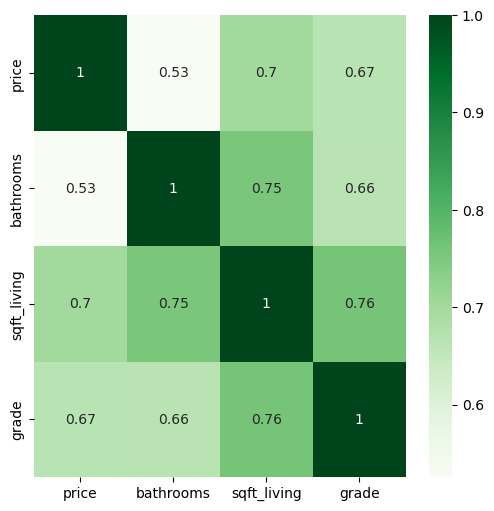

In [10]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(6, 6))

# Create the correlation heatmap in seaborn with a green color map
corr = sns.heatmap(df_sub.corr(), annot=True, ax=ax, cmap='Greens')

# Save the heatmap
plt.savefig('king_heatmap_simple.png')

## Result 
1. price and sqft_living (0.701993): There is a strong positive correlation between the price of a home and the square footage of the home's interior living space. This indicates that, in general, as the size of a home increases, the price tends to increase as well.

2. price and grade (0.667496): There is a strong positive correlation between house price and house grade. The higher the grade of a home, the higher the price tends to be.

3. PRICE and SQFT_ABOVE (0.605495): There is a correlation between above ground floor area and house price. As the above ground floor area increases, the house price tends to increase as well.

4. price and sqft_living15 (0.584688): There is a positive correlation between the average size of the interior living space of the 15 closest houses and the house price. This indicates that the size of neighboring houses can affect house prices.

### 3.2. Create scatterplots 

C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

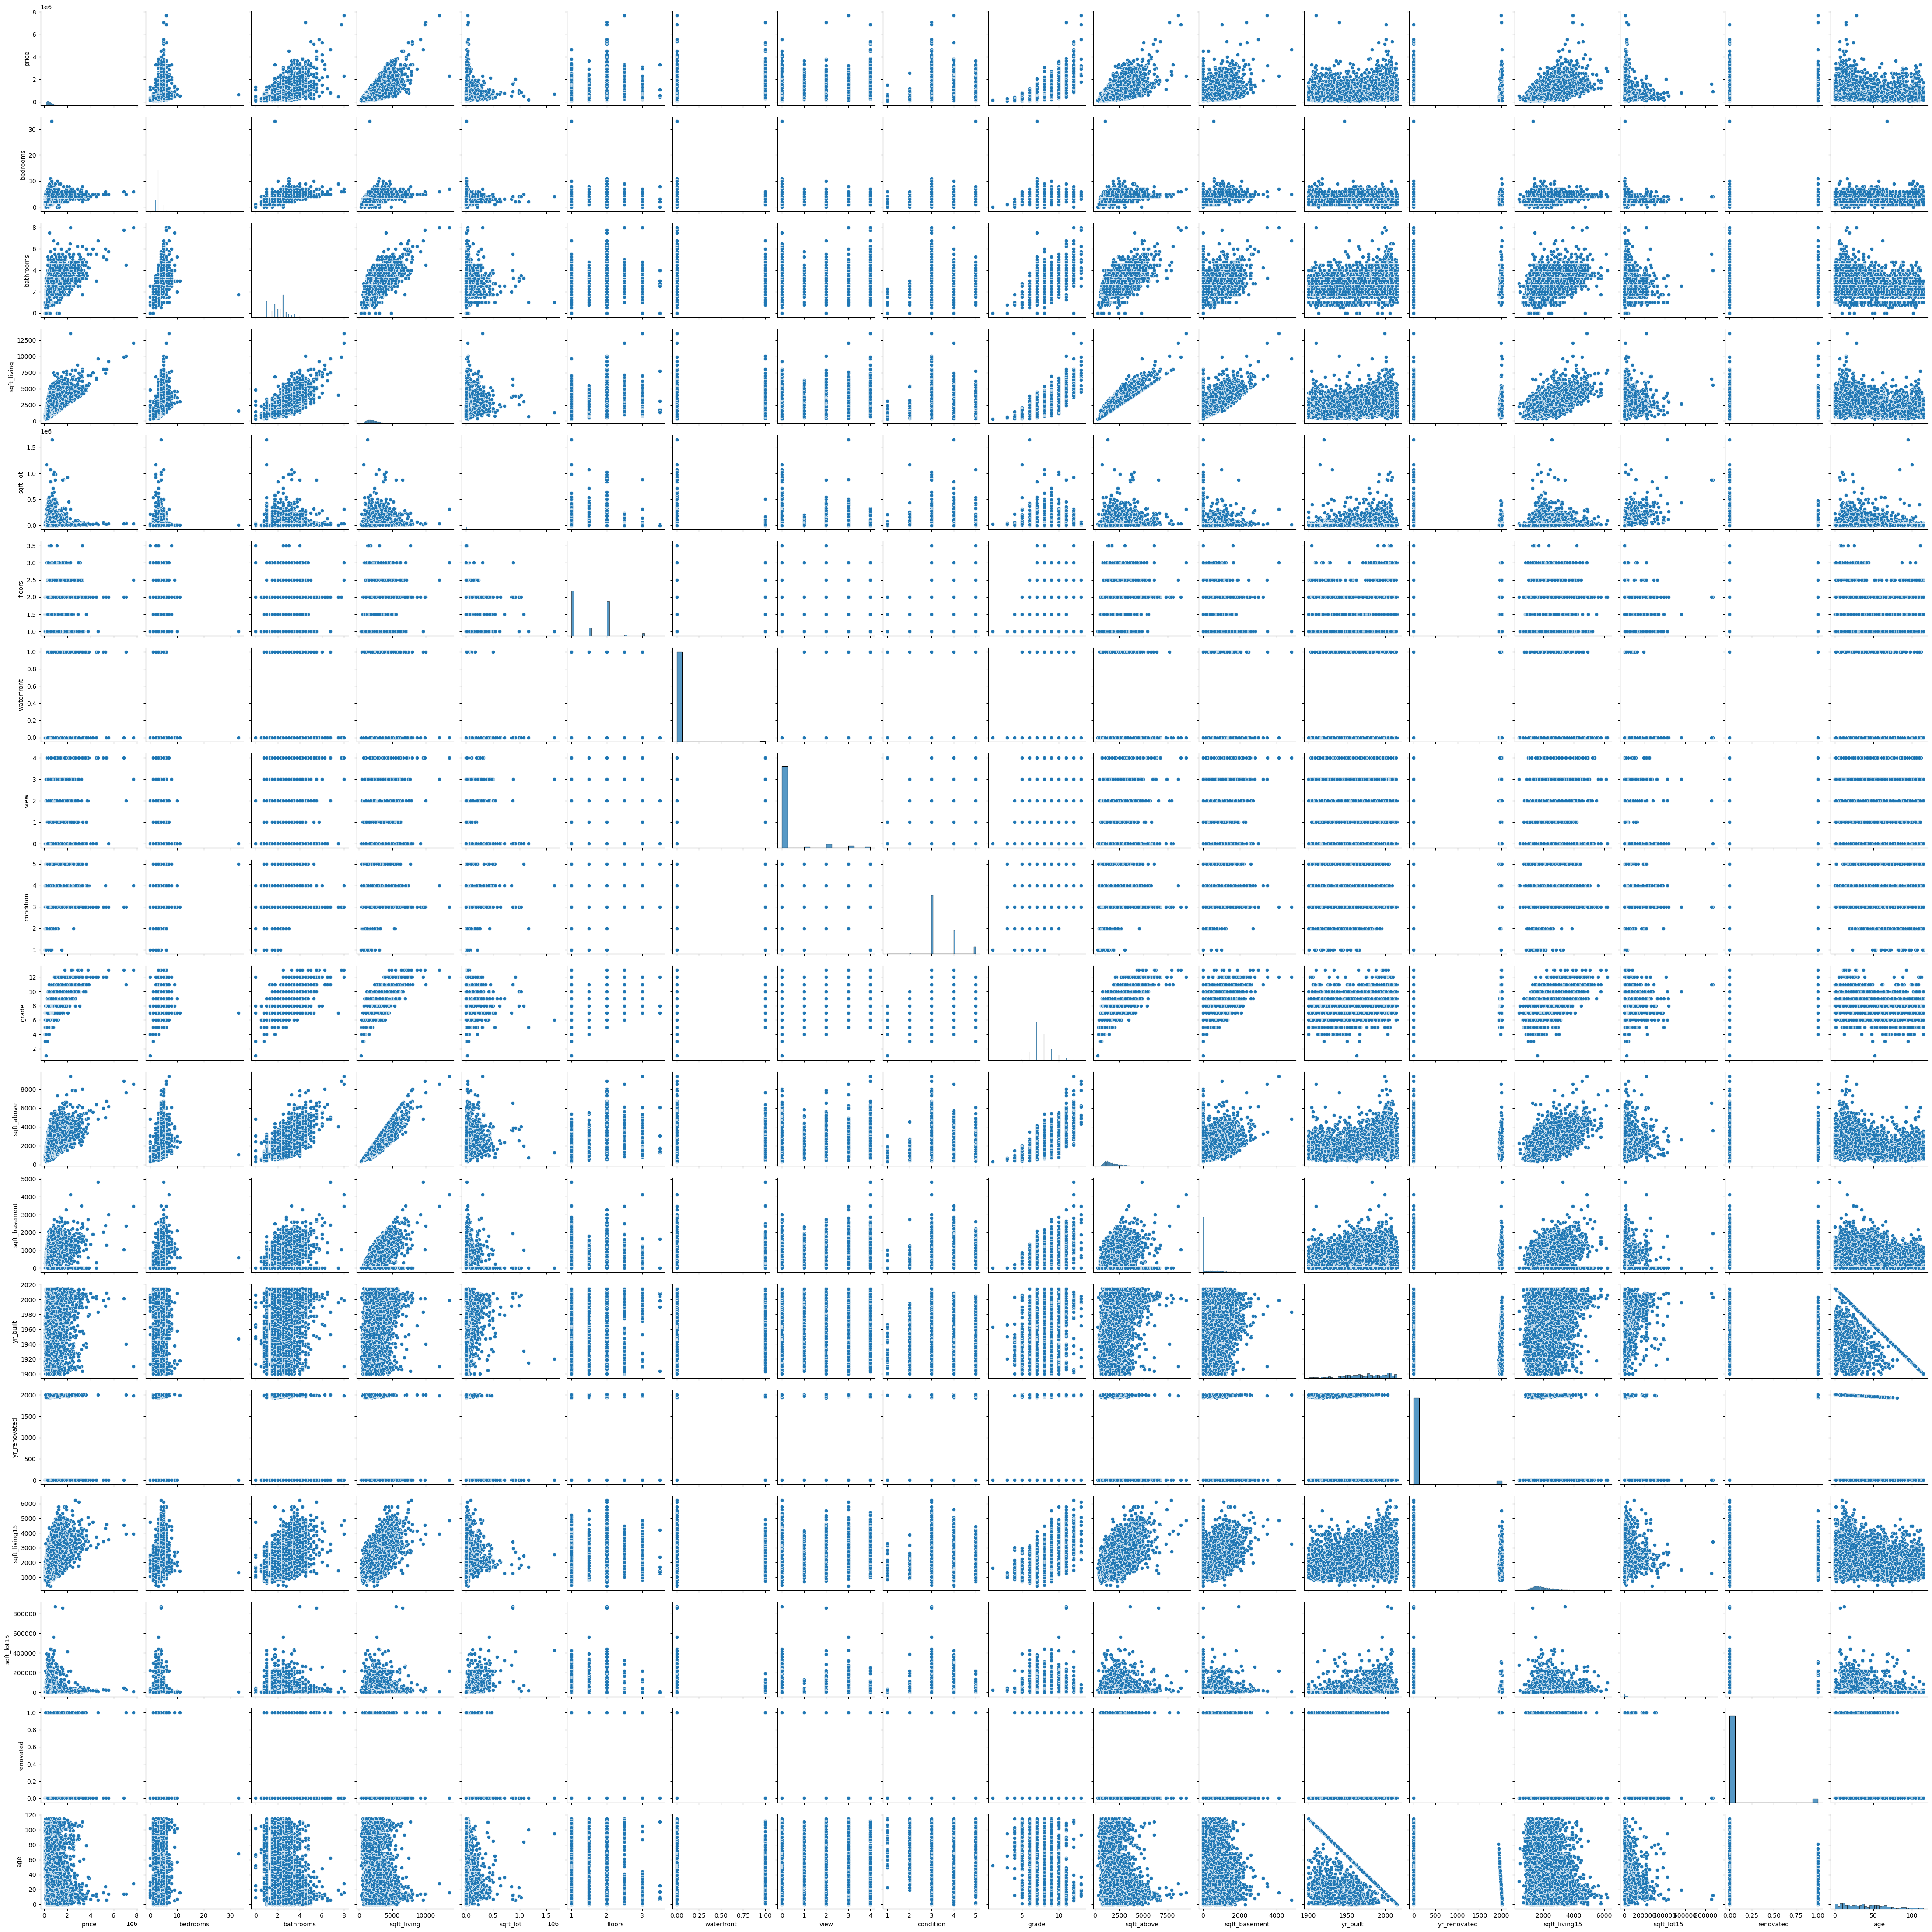

In [23]:
#draw all pair plot
g = sns.pairplot(df_sub)

In [25]:
# save the plot
g.savefig("king_pairplot.png")

### Create a second subset of significantly correlated variables and the categorical variables: waterfront, grade, view, and condition.

C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

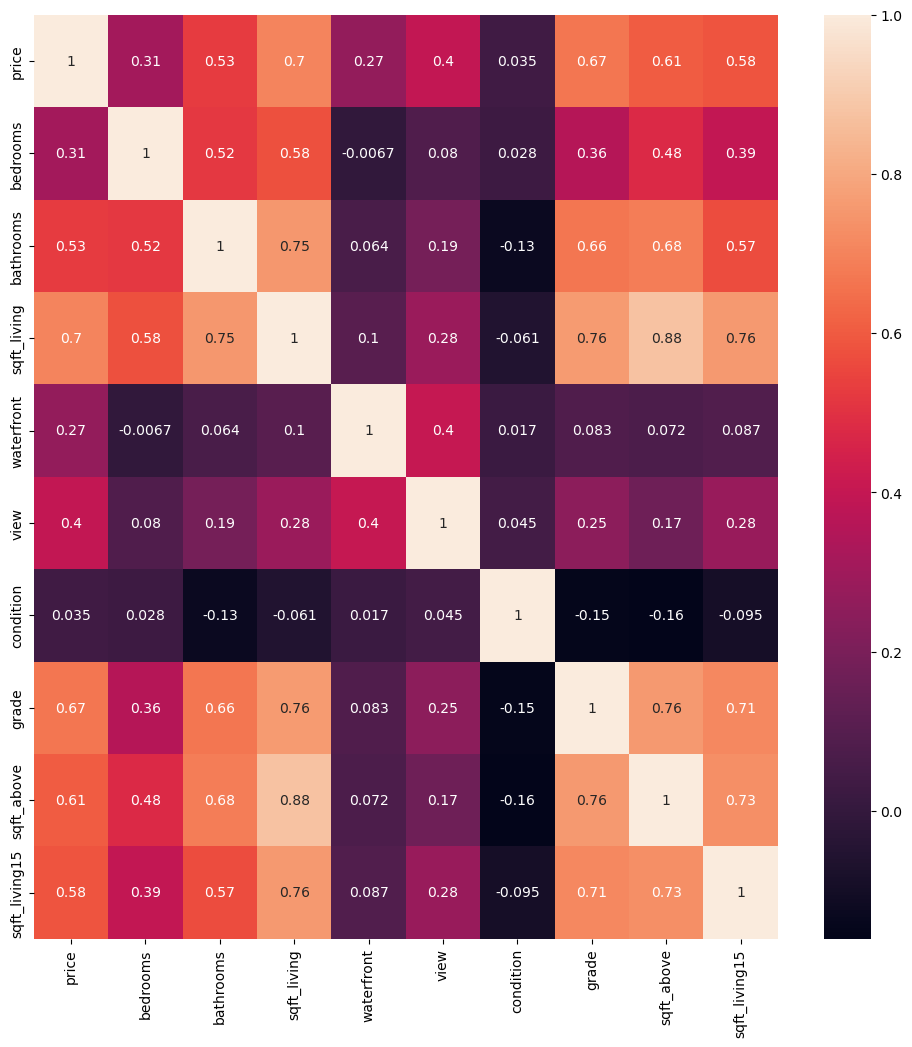

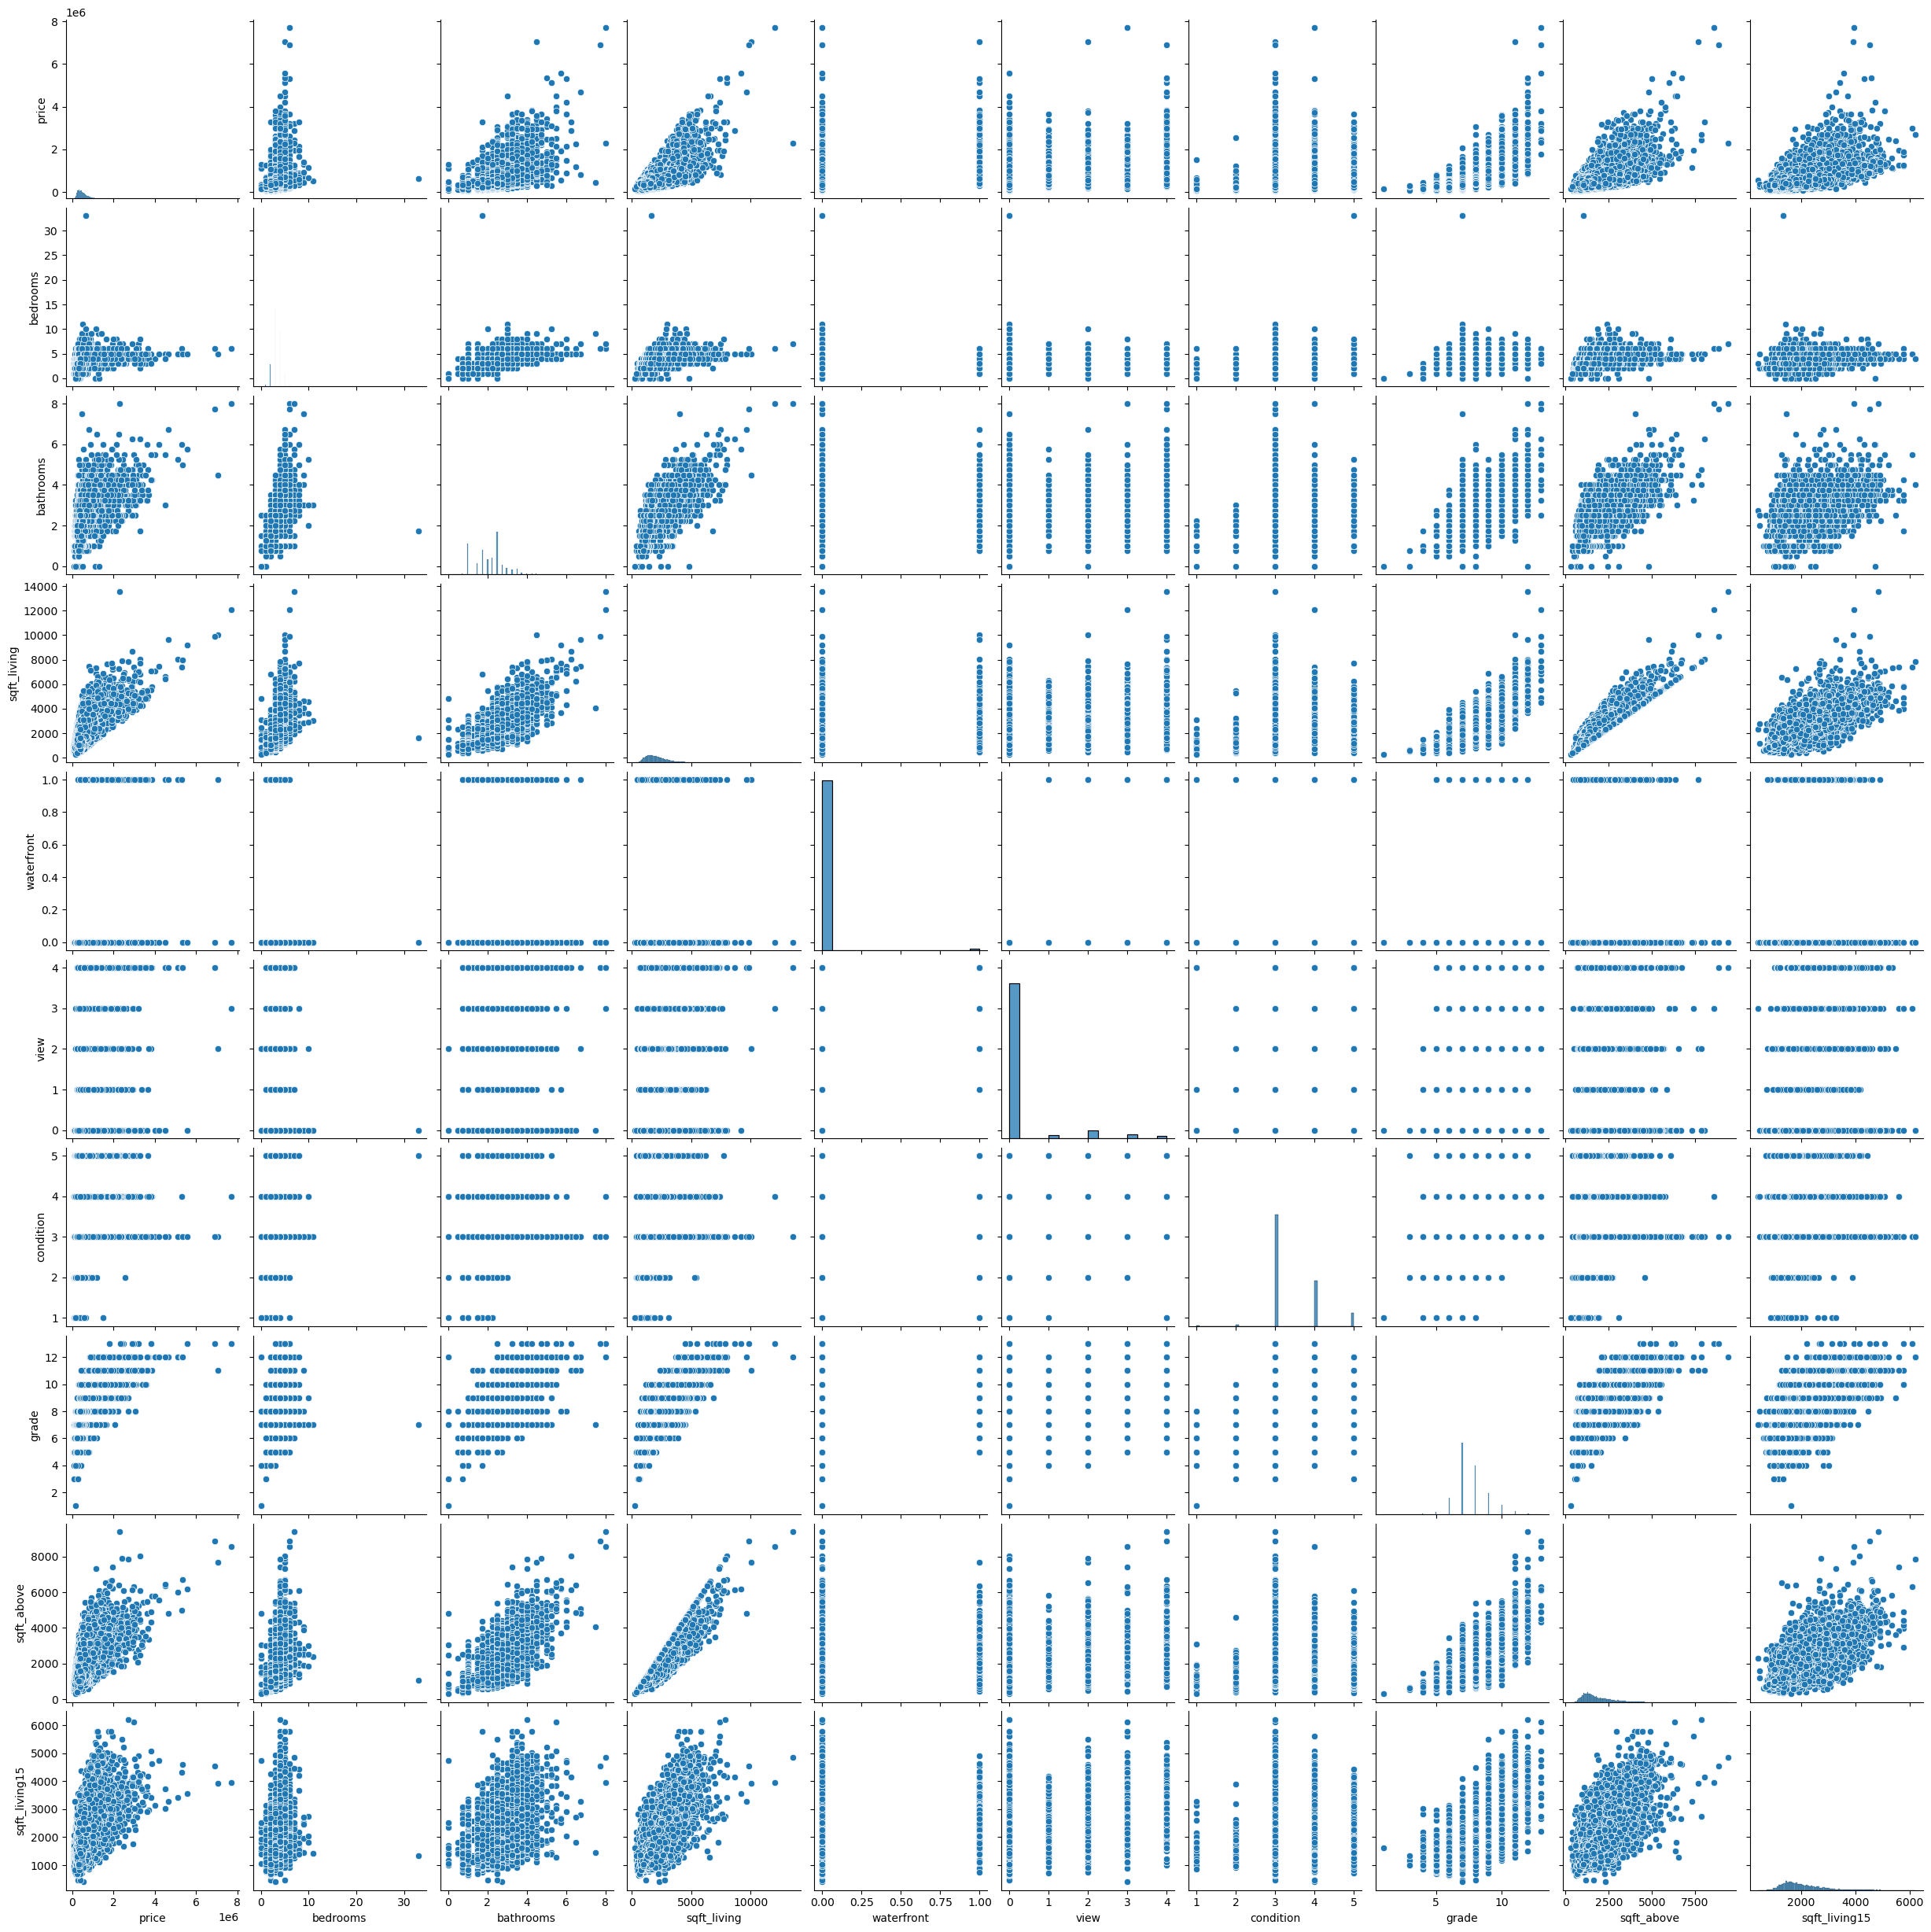

In [17]:
#create second subset, and plot heatmap and pairplot
df_sub2 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_living15']]

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_sub2.corr(), annot=True, ax=ax)

# Save the heatmap
plt.savefig('king_heatmap2.png')

#draw all pair plot
g = sns.pairplot(df_sub2)
# save the plot
g.savefig("king_pairplot2.png")

C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

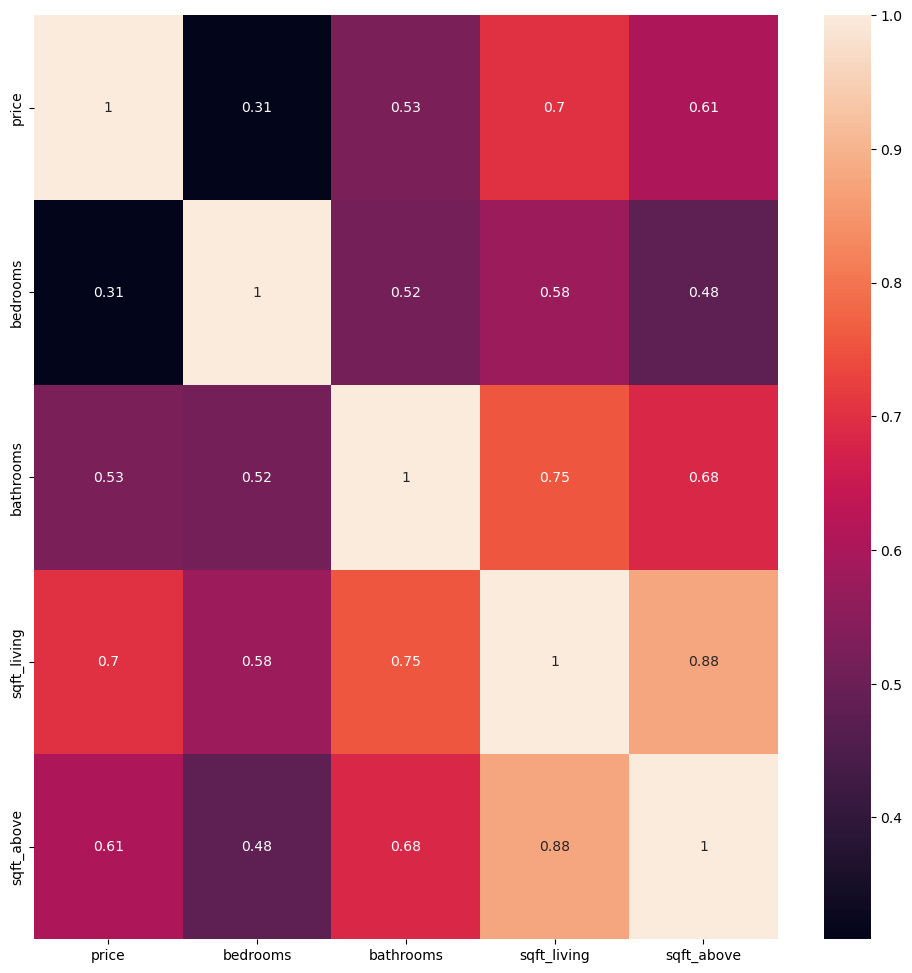

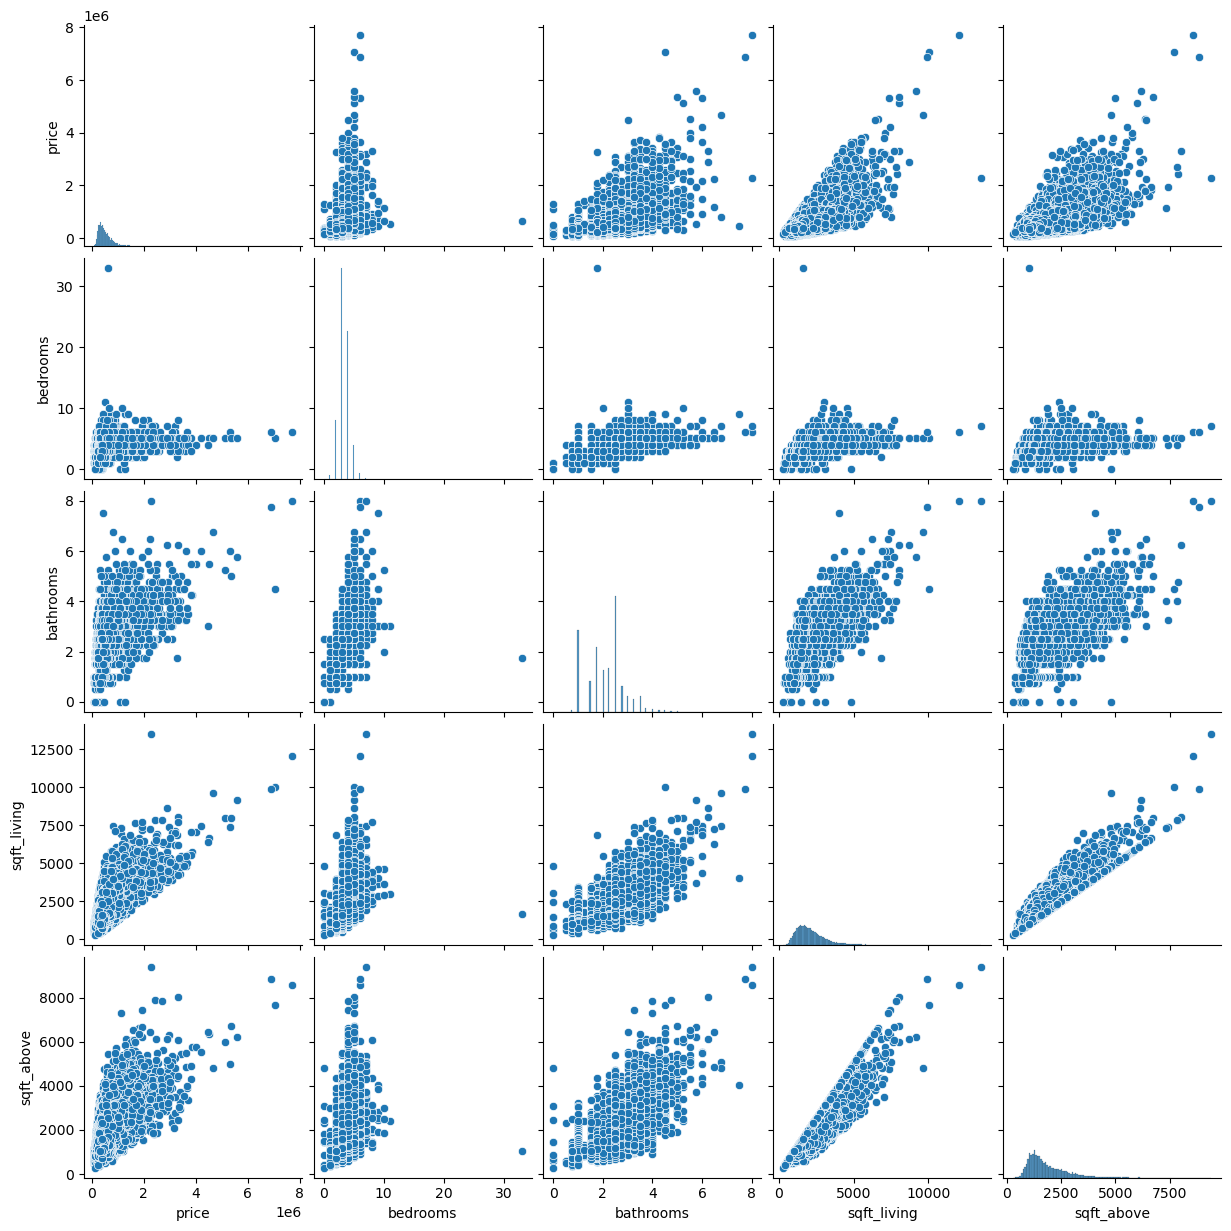

In [18]:
#create second subset, and plot heatmap and pairplot
df_sub3 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']]

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_sub3.corr(), annot=True, ax=ax)

# Save the heatmap
plt.savefig('king_heatmap3.png')

#draw all pair plot
g = sns.pairplot(df_sub3)
# save the plot
g.savefig("king_pairplot3.png")

C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


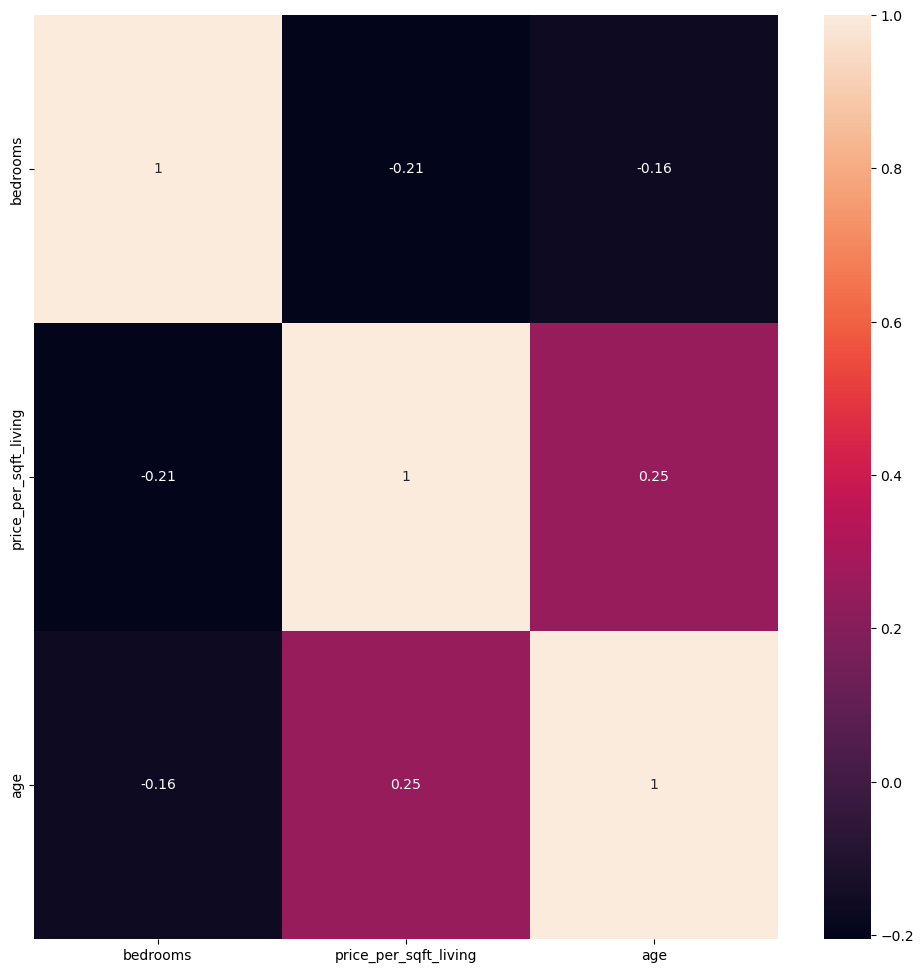

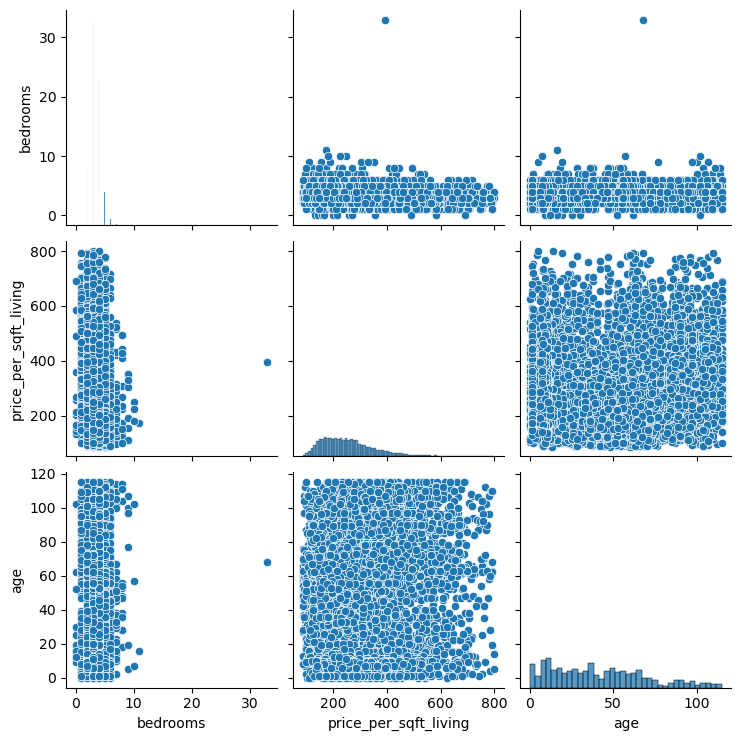

In [13]:
#create second subset, and plot heatmap and pairplot
df_sub4 = df[['bedrooms', 'price_per_sqft_living', 'age']]

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_sub4.corr(), annot=True, ax=ax)

# Save the heatmap
plt.savefig('king_heatmap4.png')

#draw all pair plot
g = sns.pairplot(df_sub4)
# save the plot
g.savefig("king_pairplot4.png")

C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

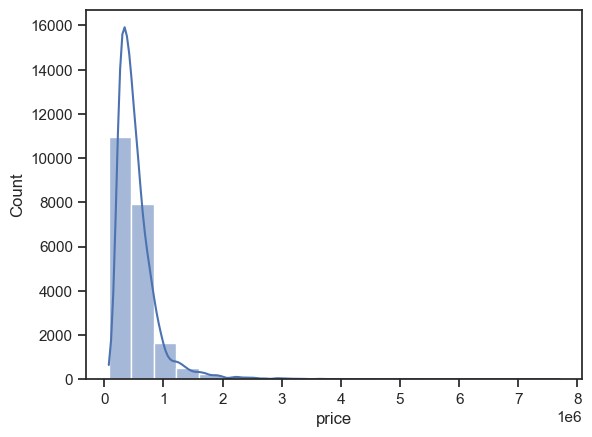

In [30]:
#histogram of 'price'
sns.histplot(df_sub2['price'], bins = 20, kde = True)

## 4. K-meaning analysis
[Go back to Table of contents](#House-Sales-in-King-County,-USA)

In [14]:
# for K-meaning clustering, import libraries. 
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler #for data standardization 

### In our K-meansing clustering analysis, we want to use price and the variables bedrooms, bathrooms, and sqft_living. 

In [15]:
#Keep rate, votes, apporx_cost variables
df_k=df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

### 4.1. elbow technique

In [21]:
num_df = range(1, 10) # Defines the range of potential clusters in the data.
kdf = [KMeans(n_clusters=i) for i in num_df] # Defines k-means clusters in the range assigned above.
score_df = [kdf[i].fit(df_k).score(df_k) for i in range(len(kdf))] # Creates a score that represents  a rate of variation for the given cluster option.

C:\Users\jinu5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jinu5\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jinu5\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\jinu5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

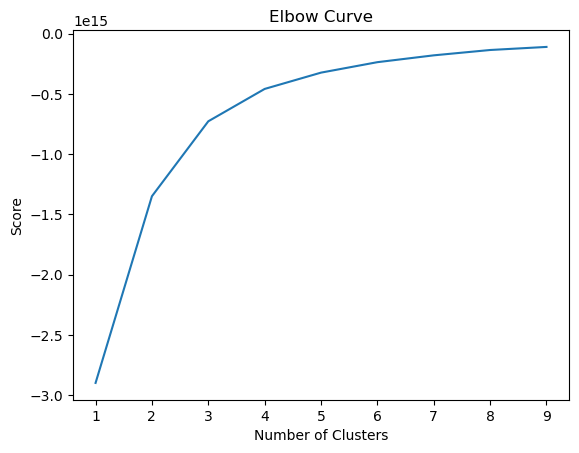

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_df,score_df)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The optimal number of clusters is 3. 

### 4.2. K-meaning clustering - full records

In [23]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

# Fit the k-means object to the data.
kmeans.fit(df_k)

C:\Users\jinu5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [24]:
df_k['clusters'] = kmeans.fit_predict(df_k)
df_k['clusters'].value_counts()

C:\Users\jinu5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jinu5\AppData\Local\Temp\ipykernel_9416\2544192332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


clusters
0    14970
2     5866
1      600
Name: count, dtype: int64

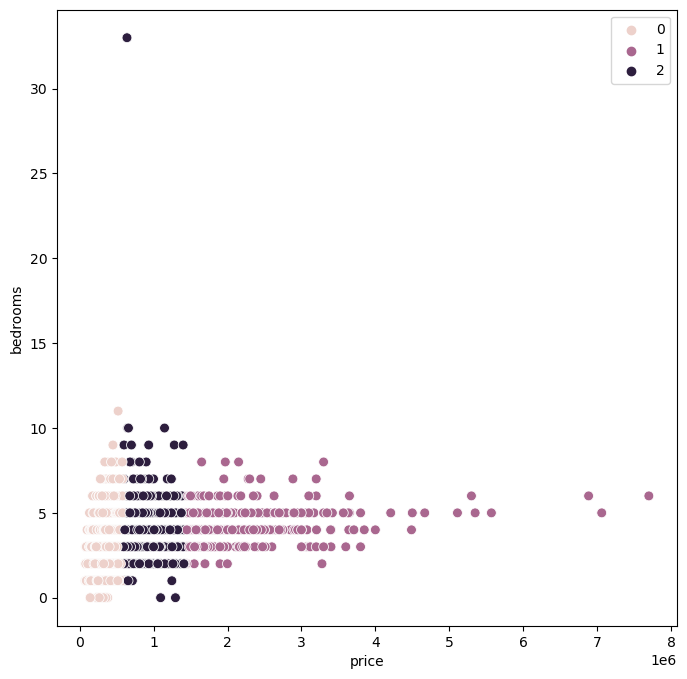

In [25]:
# Plot the clusters for the "price" and "bedrooms" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_k['price'], y=df_k['bedrooms'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('bedrooms') # Label y-axis.
plt.savefig('cluster_plot_price_bedrooms.png', format='png')
plt.show()

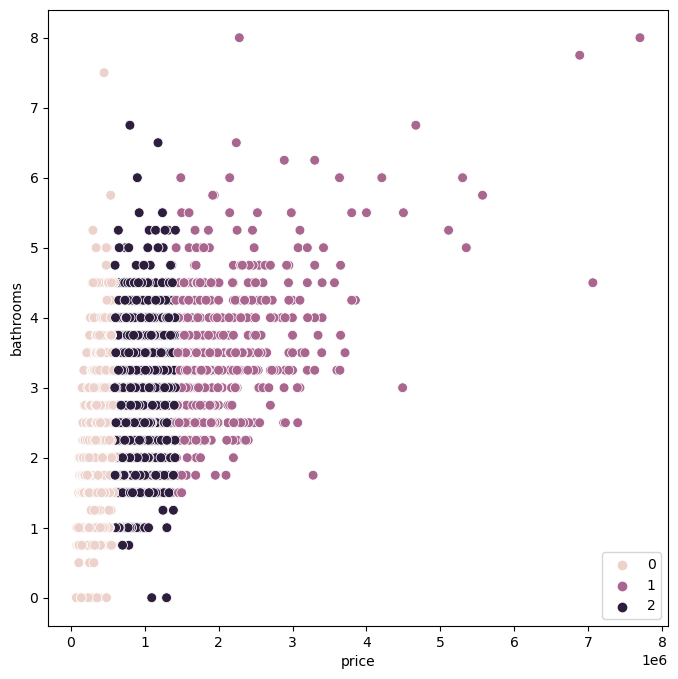

In [26]:
# Plot the clusters for the "price" and "bathrooms" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_k['price'], y=df_k['bathrooms'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('bathrooms') # Label y-axis.
plt.savefig('cluster_plot_price_bathrooms.png', format='png')
plt.show()

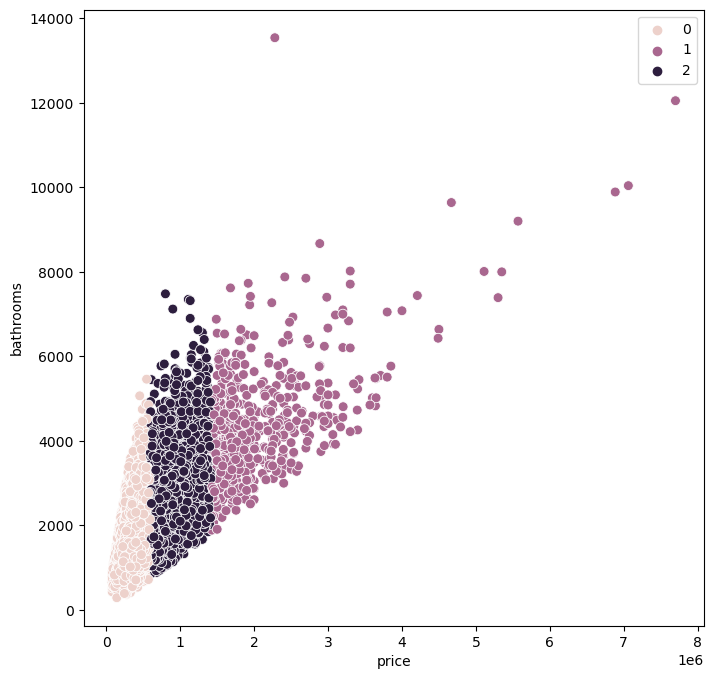

In [27]:
# Plot the clusters for the "price" and "sqft_living" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_k['price'], y=df_k['sqft_living'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('bathrooms') # Label y-axis.
plt.savefig('cluster_plot_price_sqft_living.png', format='png')
plt.show()

In [28]:
df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'purple'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\jinu5\AppData\Local\Temp\ipykernel_9416\155896531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
df_k


price  bedrooms  bathrooms  sqft_living  clusters      cluster
0      221900.0         3       1.00         1180         0         pink
1      538000.0         3       2.25         2570         0         pink
2      180000.0         2       1.00          770         0         pink
3      604000.0         4       3.00         1960         2  dark purple
4      510000.0         3       2.00         1680         0         pink
...         ...       ...        ...          ...       ...          ...
21608  360000.0         3       2.50         1530         0         pink
21609  400000.0         4       2.50         2310         0         pink
21610  402101.0         2       0.75         1020         0         pink
21611  400000.0         3       2.50         1600         0         pink
21612  325000.0         2       0.75         1020         0         pink

[21436 rows x 6 columns]

In [30]:
df_k.groupby('cluster').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                               'bathrooms':['mean', 'median'], 
                         'sqft_living':['mean', 'median']})

price             bedrooms        bathrooms         \
                     mean     median      mean median      mean median   
cluster                                                                  
dark purple  8.099570e+05   754000.0  3.740880    4.0  2.519093    2.5   
pink         3.751463e+05   370000.0  3.194322    3.0  1.905361    2.0   
purple       2.032730e+06  1795000.0  4.183333    4.0  3.478750    3.5   

             sqft_living          
                    mean  median  
cluster                           
dark purple  2726.207296  2650.0  
pink         1740.246693  1660.0  
purple       4335.730000  4160.0

## 5. Merge clusters to original data,  and extract
[Go back to Table of contents](#House-Sales-in-King-County,-USA)

In [31]:
df_merged = pd.merge(df, df_k, left_index=True, right_index=True)

In [32]:
df_merged.head(5)

id             date   price_x  bedrooms_x  bathrooms_x  \
0  7129300520  20141013T000000  221900.0           3         1.00   
1  6414100192  20141209T000000  538000.0           3         2.25   
2  5631500400  20150225T000000  180000.0           2         1.00   
3  2487200875  20141209T000000  604000.0           4         3.00   
4  1954400510  20150218T000000  510000.0           3         2.00   

   sqft_living_x  sqft_lot  floors  waterfront  view  condition  grade  \
0           1180      5650     1.0           0     0          3      7   
1           2570      7242     2.0           0     0          3      7   
2            770     10000     1.0           0     0          3      6   
3           1960      5000     1.0           0     0          5      7   
4           1680      8080     1.0           0     0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  renovated  age   price_y  bedrooms_y  \
0 -122.257           1340        5650          0   60  221900.0           3   
1 -122.319           1690        7639          1   24  538000.0           3   
2 -122.233           2720        8062          0   82  180000.0           2   
3 -122.393           1360        5000          0   50  604000.0           4   
4 -122.045           1800        7503          0   28  510000.0           3   

   bathrooms_y  sqft_living_y  clusters      cluster  
0         1.00           1180         0         pink  
1         2.25           2570         0         pink  
2         1.00            770         0         pink  
3         3.00           1960         2  dark purple  
4         2.00           1680         0         pink

In [33]:
# Check if price_x and price_y are equal for each row
prices_equal = df_merged['price_x'] == df_merged['price_y']

# Count the number of rows where price_x and price_y are not equal
num_not_equal = (~prices_equal).sum()

# Print the number of rows where price_x and price_y are not equal
print("Number of rows where price_x and price_y are not equal:", num_not_equal)


Number of rows where price_x and price_y are not equal: 0


In [17]:
#extract dataset 'df_merged'
dfed.to_csv(r"C:\Users\jinu5\Desktop\careerfoundry\Achivement 6\KingCounty_2024_2\02 Data\prepared data\kc_cluster_1.csv")